In [1]:
%matplotlib inline

In [2]:
#We will start first by uploading json and pandas using the commands below:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Next we will read the data in into an array that we call tweets.
tweets_data_path = '../data/tweets_no.json'

tweets_file = open(tweets_data_path, "r")
tweets_data = json.load(tweets_file)

In [5]:
## Ver todos los tweets es demasiada data para mostrar en jupyter y da un error
## Lo que podés hacer es explorar una muestra al azar, así:
from random import sample
sample(tweets_data, 20)

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Mon Apr 16 21:12:09 +0000 2018',
  'entities': {'hashtags': [{'indices': [13, 24], 'text': 'NoAlAborto'},
    {'indices': [25, 35], 'text': 'SiALaVida'},
    {'indices': [36, 48], 'text': 'QuieroNacer'},
    {'indices': [49, 63], 'text': 'DerechoANacer'},
    {'indices': [64, 93], 'text': 'AbortoLegalSeguroYGratuitoYa'},
    {'indices': [94, 106], 'text': 'AbortoLegal'},
    {'indices': [108, 118], 'text': 'BuenLunes'},
    {'indices': [119, 135], 'text': 'MesaPorLaVidaSF'}],
   'symbols': [],
   'urls': [],
   'user_mentions': [{'id': 4009849882,
     'id_str': '4009849882',
     'indices': [3, 11],
     'name': 'CENI',
     'screen_name': 'CENI_SF'}]},
  'favorite_count': 0,
  'favorited': False,
  'geo': None,
  'id': 985989244761071617,
  'id_str': '985989244761071617',
  'in_reply_to_screen_name': None,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_

In [6]:
len(tweets_data)

1847

In [7]:
# veamos un tweet de ejemplo
tweets_data[2]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Apr 17 11:15:34 +0000 2018',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 810064526,
    'id_str': '810064526',
    'indices': [3, 17],
    'name': 'Gabriel Ballerini',
    'screen_name': 'BalleriniVIDA'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 986201497632428033,
 'id_str': '986201497632428033',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'es',
 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 37,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
  'coordinates': None,
  'created_at': 'Mon Apr 16 13:06:52 +0000 2018',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [{'display_url': 'twitter.com/i/web/status/9…',
     'ex

In [30]:
# Recortemos los datos a lo que nos interesa por ahora
def recortar_tweet(t):
    COLUMNAS = ['created_at', 'favorite_count', 'retweet_count', 'text']
    tweet_recortado = {columna: t[columna] for columna in COLUMNAS}
    tweet_recortado['user_name'] = t['user']['name']
    return tweet_recortado

In [31]:
recortar_tweet(tweets_data[0])

{'created_at': 'Tue Apr 17 11:40:55 +0000 2018',
 'favorite_count': 0,
 'retweet_count': 12,
 'text': 'RT @LAM_Oficial: ¡Si a la Vida!¡No al aborto! #NoAlAborto',
 'user_name': 'john giraldo'}

In [32]:
# Armamos un dataframe con los tweets recortados
#we will structure the tweets data into a pandas DataFrame
recortados = [recortar_tweet(t) for t in tweets_data]
tweets = pd.DataFrame(recortados)

In [33]:
# veamos como quedó el Dataframe
tweets

,created_at,favorite_count,retweet_count,text,user_name
0,Tue Apr 17 11:40:55 +0000 2018,0,12,RT @LAM_Oficial: ¡Si a la Vida!¡No al aborto! ...,john giraldo
1,Tue Apr 17 11:38:08 +0000 2018,0,24,RT @PattRam74: Ahora a la izquierda le dió con...,Mario Astorga
2,Tue Apr 17 11:15:34 +0000 2018,0,37,RT @BalleriniVIDA: Las mujeres pobres aman a s...,jorge antunez
3,Tue Apr 17 11:12:13 +0000 2018,0,0,"@clarincom ""La preocupación por la vida no ata...",Veronica Vocos 🇦🇷
4,Tue Apr 17 11:05:41 +0000 2018,0,9,RT @VotoCatolicoES: #NoAlAborto \nEL DÍA EN QU...,Janet Cienfuegos
5,Tue Apr 17 11:02:42 +0000 2018,0,0,"@radiomitre Nadie tiene la bola de cristal , p...",Sergio Arévalo
6,Tue Apr 17 10:57:21 +0000 2018,0,9,RT @VotoCatolicoES: #NoAlAborto \nEL DÍA EN QU...,Ana María Heymans
7,Tue Apr 17 10:56:46 +0000 2018,0,0,@infobae #SiALaVida #NoAlAborto 💕🙋El aborto no...,Veronica Vocos 🇦🇷
8,Tue Apr 17 10:55:37 +0000 2018,0,0,@marcosluparia De acuerdo con Vos #NoAlAborto,FumataBlanca #SinJusticiaNoHayRepública
9,Tue Apr 17 10:45:30 +0000 2018,0,0,@AndyJGladstone #noAlAborto,FumataBlanca #SinJusticiaNoHayRepública


In [34]:
# vemos los tipos de datos de cada columna ( los que puso pandas por defecto )
tweets.dtypes

created_at        object
favorite_count     int64
retweet_count      int64
text              object
user_name         object
dtype: object

In [35]:
# Para que sean las fechas sean más sencillas de manipular conviene
# que created_at sea tratada como fecha
# La convertimos:
tweets['created_at'] = pd.to_datetime(tweets['created_at'])
tweets.dtypes

created_at        datetime64[ns]
favorite_count             int64
retweet_count              int64
text                      object
user_name                 object
dtype: object

In [36]:
tweets.head()

,created_at,favorite_count,retweet_count,text,user_name
0,2018-04-17 11:40:55,0,12,RT @LAM_Oficial: ¡Si a la Vida!¡No al aborto! ...,john giraldo
1,2018-04-17 11:38:08,0,24,RT @PattRam74: Ahora a la izquierda le dió con...,Mario Astorga
2,2018-04-17 11:15:34,0,37,RT @BalleriniVIDA: Las mujeres pobres aman a s...,jorge antunez
3,2018-04-17 11:12:13,0,0,"@clarincom ""La preocupación por la vida no ata...",Veronica Vocos 🇦🇷
4,2018-04-17 11:05:41,0,9,RT @VotoCatolicoES: #NoAlAborto \nEL DÍA EN QU...,Janet Cienfuegos


In [37]:
#¿Cómo seguimos?
#1) Agrupar por hora y graficar cantidad de tweets por hora
#2) Hacer lo mismo para los tweets del sí
#3) Hacer un gráfico comparativo donde aparezcan juntos los tweets por hora del sí y del no

In [38]:
tweets.values[0]

array([Timestamp('2018-04-17 11:40:55'), 0, 12,
       'RT @LAM_Oficial: ¡Si a la Vida!¡No al aborto! #NoAlAborto',
       'john giraldo'], dtype=object)

In [52]:
dts = tweets['created_at']

In [ ]:
tx=tweets['text'][2]

In [ ]:
tx.capitalize
tx

In [42]:
# creo columnas para agrupar
tweets['hour']= dts.dt.hour
tweets['date']= dts.dt.date
tweets

,created_at,favorite_count,retweet_count,text,user_name,hour,date
0,2018-04-17 11:40:55,0,12,RT @LAM_Oficial: ¡Si a la Vida!¡No al aborto! ...,john giraldo,11,2018-04-17
1,2018-04-17 11:38:08,0,24,RT @PattRam74: Ahora a la izquierda le dió con...,Mario Astorga,11,2018-04-17
2,2018-04-17 11:15:34,0,37,RT @BalleriniVIDA: Las mujeres pobres aman a s...,jorge antunez,11,2018-04-17
3,2018-04-17 11:12:13,0,0,"@clarincom ""La preocupación por la vida no ata...",Veronica Vocos 🇦🇷,11,2018-04-17
4,2018-04-17 11:05:41,0,9,RT @VotoCatolicoES: #NoAlAborto \nEL DÍA EN QU...,Janet Cienfuegos,11,2018-04-17
5,2018-04-17 11:02:42,0,0,"@radiomitre Nadie tiene la bola de cristal , p...",Sergio Arévalo,11,2018-04-17
6,2018-04-17 10:57:21,0,9,RT @VotoCatolicoES: #NoAlAborto \nEL DÍA EN QU...,Ana María Heymans,10,2018-04-17
7,2018-04-17 10:56:46,0,0,@infobae #SiALaVida #NoAlAborto 💕🙋El aborto no...,Veronica Vocos 🇦🇷,10,2018-04-17
8,2018-04-17 10:55:37,0,0,@marcosluparia De acuerdo con Vos #NoAlAborto,FumataBlanca #SinJusticiaNoHayRepública,10,2018-04-17
9,2018-04-17 10:45:30,0,0,@AndyJGladstone #noAlAborto,FumataBlanca #SinJusticiaNoHayRepública,10,2018-04-17


In [43]:
gr=tweets.groupby(['hour','date'])

In [46]:
#gr=tweets.groupby(['date','hour'])

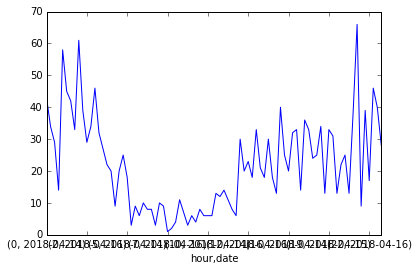

In [44]:
gr.count()['created_at'].plot()

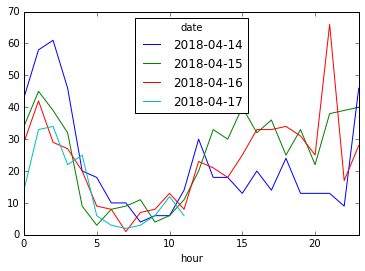

In [45]:
gr.count()['created_at'].unstack().plot()

In [50]:
df=tweets.groupby(tweets['created_at'].dt.hour)
df.head()

,created_at,favorite_count,retweet_count,text,user_name
0,2018-04-17 11:40:55,0,12,RT @LAM_Oficial: ¡Si a la Vida!¡No al aborto! ...,john giraldo
1,2018-04-17 11:38:08,0,24,RT @PattRam74: Ahora a la izquierda le dió con...,Mario Astorga
2,2018-04-17 11:15:34,0,37,RT @BalleriniVIDA: Las mujeres pobres aman a s...,jorge antunez
3,2018-04-17 11:12:13,0,0,"@clarincom ""La preocupación por la vida no ata...",Veronica Vocos 🇦🇷
4,2018-04-17 11:05:41,0,9,RT @VotoCatolicoES: #NoAlAborto \nEL DÍA EN QU...,Janet Cienfuegos
6,2018-04-17 10:57:21,0,9,RT @VotoCatolicoES: #NoAlAborto \nEL DÍA EN QU...,Ana María Heymans
7,2018-04-17 10:56:46,0,0,@infobae #SiALaVida #NoAlAborto 💕🙋El aborto no...,Veronica Vocos 🇦🇷
8,2018-04-17 10:55:37,0,0,@marcosluparia De acuerdo con Vos #NoAlAborto,FumataBlanca #SinJusticiaNoHayRepública
9,2018-04-17 10:45:30,0,0,@AndyJGladstone #noAlAborto,FumataBlanca #SinJusticiaNoHayRepública
10,2018-04-17 10:44:45,0,13,RT @ToyitoSal: #NoAlAborto\nUna parte verdader...,Ricardo Mayorga


In [10]:
#dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       #'2015-Jul-6', '07-07-2015', '20150708'])
#dates

In [74]:
from datetime import datetime
datetime(year=2015, month=7, day=4, hour=11, minute=40, second=8)

datetime.datetime(2015, 7, 4, 11, 40, 8)

In [1]:
# tendria que leer una fecha con el formato y luego ver como agrupar por hora (leer 03.08..)

In [63]:
import numpy as np
date = np.array('2018-04-17 11:40:55', dtype=np.datetime64)
date

array(datetime.datetime(2018, 4, 17, 11, 40, 55), dtype='datetime64[s]')

In [91]:
import pandas as pd
date = pd.to_datetime(tweets['created_at'])
date[0:2]

0   2018-04-17 11:40:55
1   2018-04-17 11:38:08
Name: created_at, dtype: datetime64[ns]

In [6]:
# leer el formato, ahora como opero como si fuera un numero

In [92]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [10]:
x=np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
# ejemplo: df.groupby(df['Date'].dt.hour)